In [21]:
import pandas as pd
import numpy as np
import datetime
import pytz
import matplotlib.pyplot as plt
folder = "/home/ben/data/darwin_measured/"

In [22]:
def open_measurements(path):
    df = pd.read_csv(path)
    df.index = pd.DatetimeIndex(df.datetime, tz=pytz.timezone("Pacific/Galapagos")).tz_convert(datetime.timezone.utc)
    df = df.loc["2022-04-02":"2022-09-29"]
    return df.resample("D").sum()

In [23]:
df = open_measurements(folder + "11_AWS-PCerroCrocker_data.csv")
df.head()

/tmp/ipykernel_2410079/1163385197.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return df.resample("D").sum()


,T,RH,SLR,WS,WD,PCP_tot_bucket,PCP_diff_radar,PCP_acoustic,FOG,ST,Vwc
datetime,,,,,,,,,,,
2022-04-02 00:00:00+00:00,2880.04,14300.0,14903.725,491.439,23047.80,10.6,3.78,0.0,0.0,3237.52,84.450
2022-04-03 00:00:00+00:00,2880.26,14400.0,17867.927,673.353,23796.90,14.2,3.30,0.0,0.0,3215.16,86.811
2022-04-04 00:00:00+00:00,2881.05,14385.6,19085.374,736.541,25123.80,4.8,0.96,0.0,0.0,3234.11,86.655
2022-04-05 00:00:00+00:00,2882.49,14400.0,21289.298,468.794,25266.43,5.6,1.32,0.0,0.0,3260.98,86.907
2022-04-06 00:00:00+00:00,2921.43,14400.0,22657.283,476.219,24730.77,9.8,1.56,0.0,0.0,3293.59,86.836


In [24]:
wrf_prcp = pd.read_csv("/home/ben/projects/darwin/prcp.csv")
wrf_prcp.index = pd.DatetimeIndex(wrf_prcp["datetime"], tz=datetime.timezone.utc)
wrf_prcp.drop("datetime", axis=1, inplace=True)
wrf_prcp = wrf_prcp.loc["2022-04-02":"2022-09-29"] * 24

In [25]:
# barplot

# fig, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize=(12,8), sharex=True, sharey=True)
# df["PCP_diff_radar"].plot(ax=ax1, kind="bar")
# df["PCP_tot_bucket"].plot(ax=ax2, kind="bar")
# wrf_prcp["crocker"].plot(ax=ax3, kind="bar")
# plt.show()

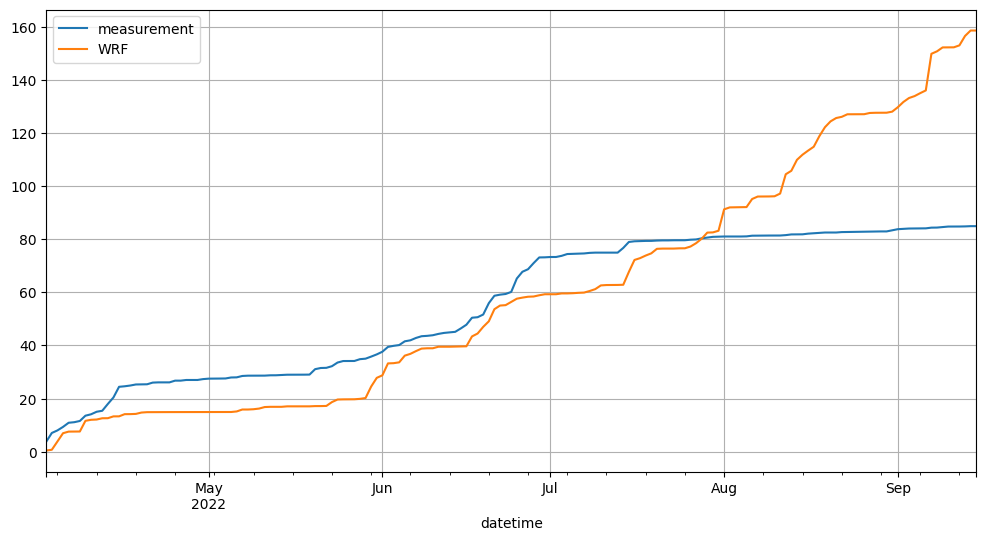

In [33]:
fig, ax = plt.subplots(figsize=(12,6))
df["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement")
# df["PCP_tot_bucket"].cumsum().plot(ax=ax)
wrf_prcp["crocker"].loc[:"2022-09-15"].cumsum().plot(ax=ax, label="WRF")
plt.legend()
plt.grid()
plt.show()

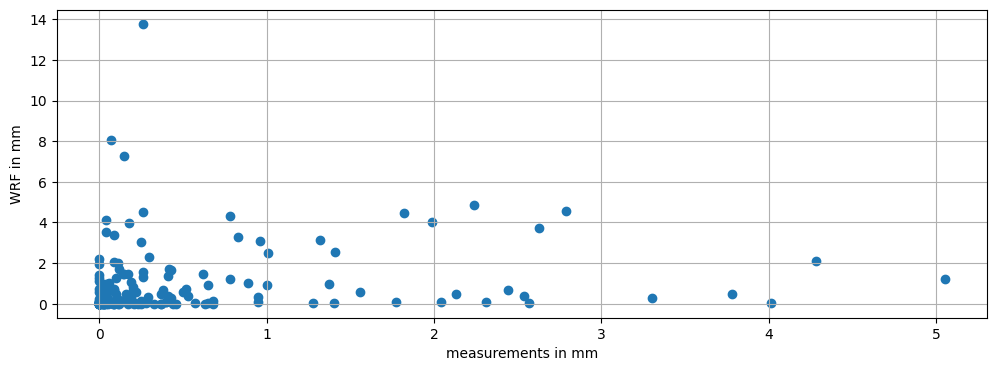

In [34]:
fig, ax = plt.subplots(figsize=(12,4))
plt.scatter(df["PCP_diff_radar"], wrf_prcp["crocker"].loc[:"2022-09-15"])
plt.xlabel("measurements in mm")
plt.ylabel("WRF in mm")
plt.grid()

/tmp/ipykernel_2410079/1163385197.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return df.resample("D").sum()


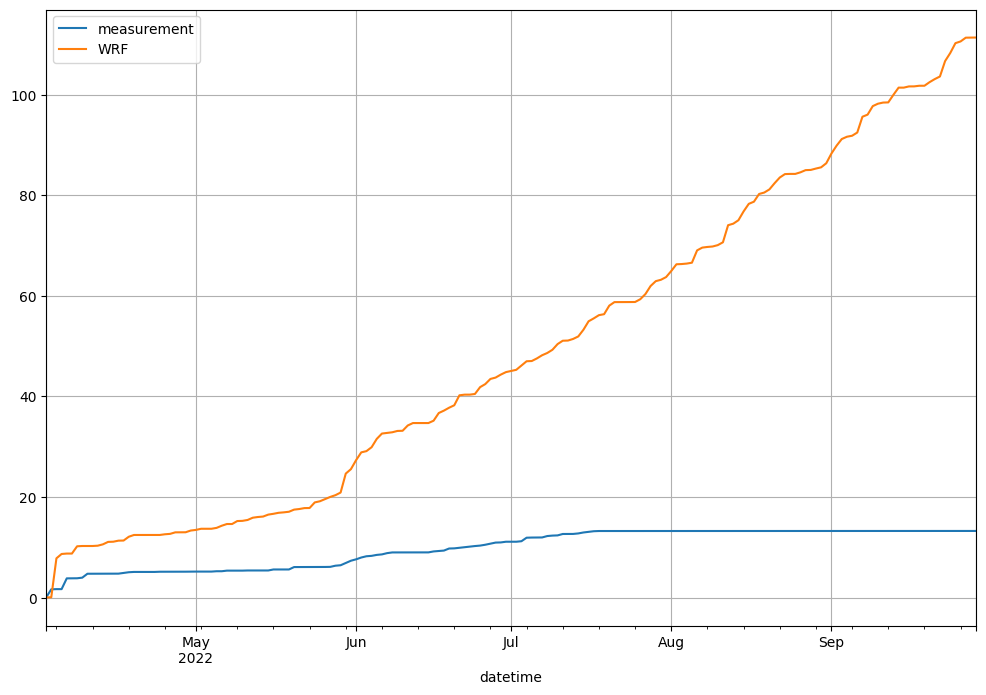

In [8]:
df = open_measurements(folder + "26_AWS-PPuertoAyora_data.csv")
fig, ax = plt.subplots(figsize=(12,8))
df["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement")
# df["PCP_tot_bucket"].cumsum().plot(ax=ax)
wrf_prcp["puertoayora"].cumsum().plot(ax=ax, label="WRF")
plt.legend()
plt.grid()
plt.show()

/tmp/ipykernel_2410079/1163385197.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return df.resample("D").sum()


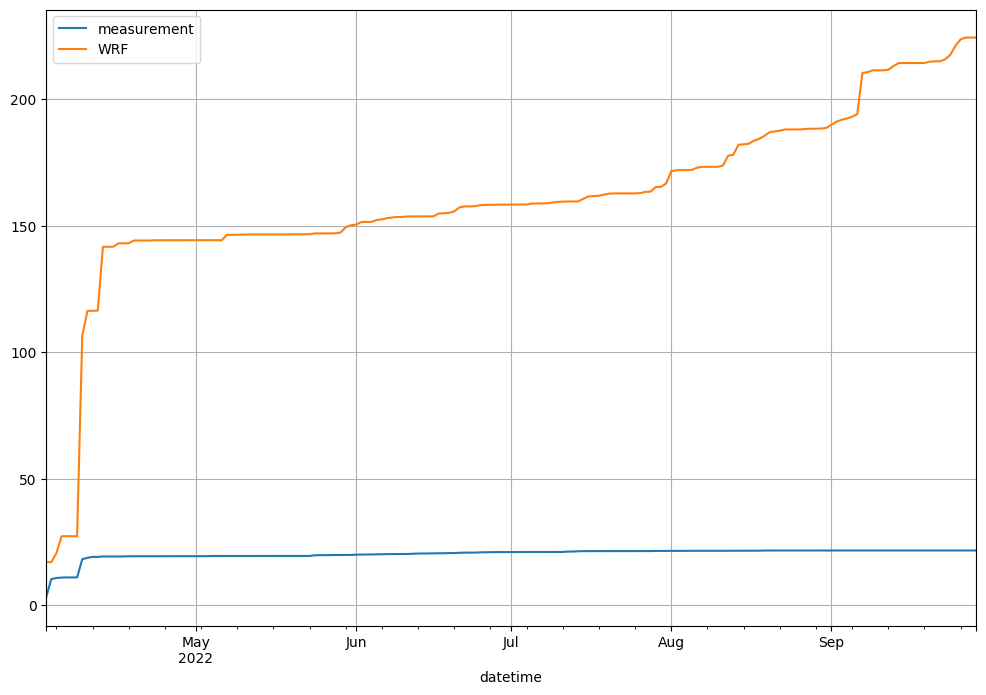

In [9]:
df = open_measurements(folder + "09_AWS-PSantaRosa_data.csv")
fig, ax = plt.subplots(figsize=(12,8))
df["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement")
# df["PCP_tot_bucket"].cumsum().plot(ax=ax)
wrf_prcp["rosa"].cumsum().plot(ax=ax, label="WRF")
plt.legend()
plt.grid()
plt.show()

/tmp/ipykernel_2410079/1163385197.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return df.resample("D").sum()


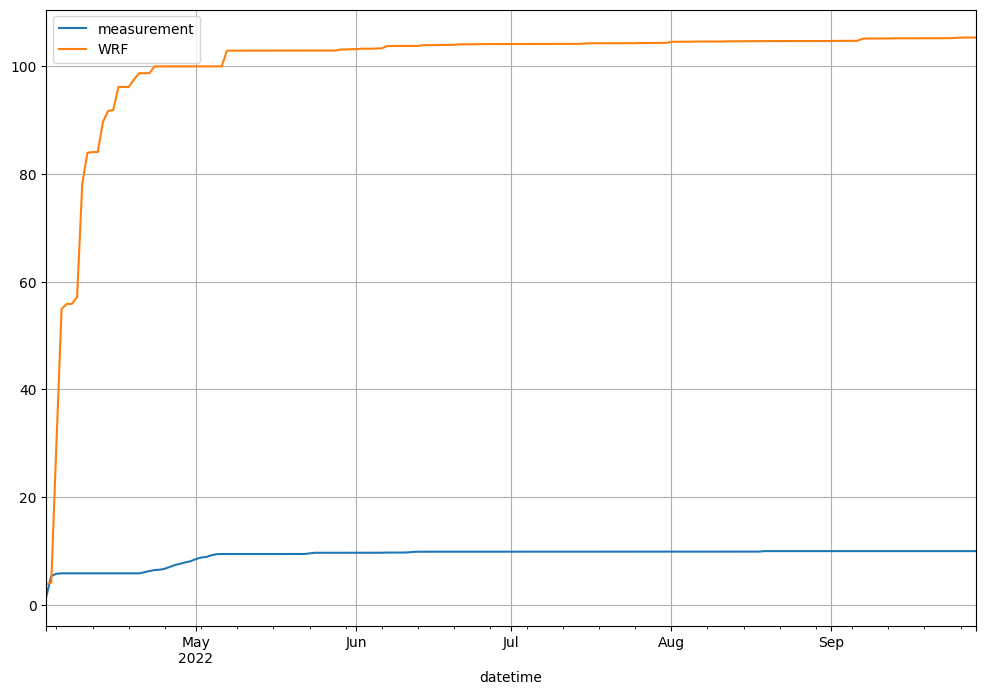

In [10]:
df = open_measurements(folder + "30_AWS-PMinasRojas_data.csv")
fig, ax = plt.subplots(figsize=(12,8))
df["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement")
# df["PCP_tot_bucket"].cumsum().plot(ax=ax)
wrf_prcp["minasrojas"].cumsum().plot(ax=ax, label="WRF")
plt.legend()
plt.grid()
plt.show()

/tmp/ipykernel_2410079/1163385197.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return df.resample("D").sum()


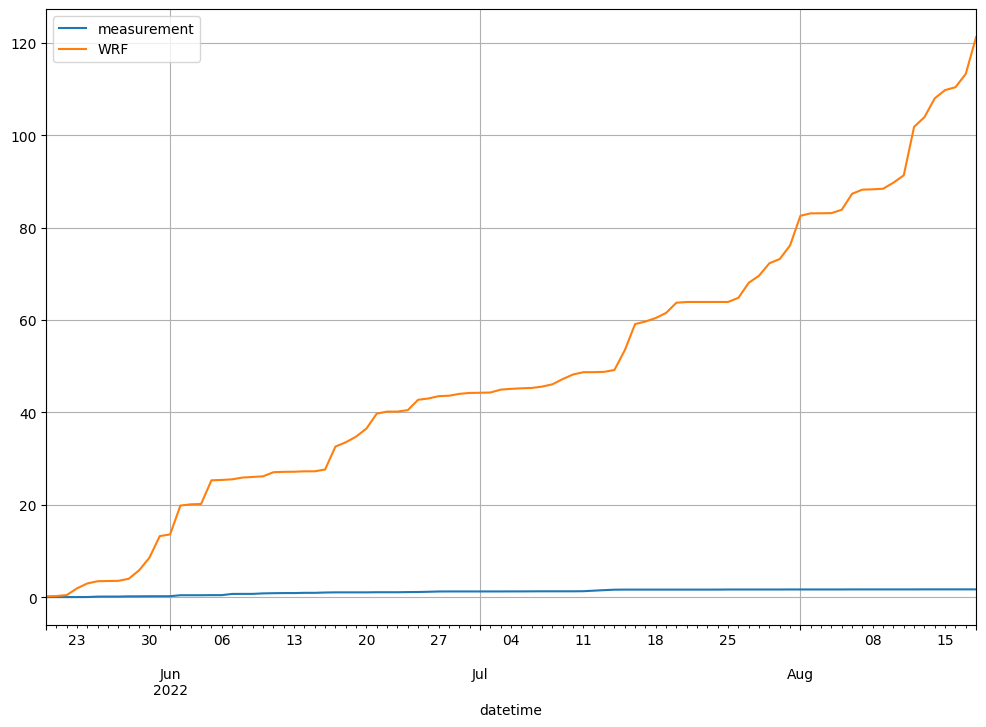

In [11]:
df = open_measurements(folder + "20_AWS-PElJunco_data.csv")
fig, ax = plt.subplots(figsize=(12,8))
df["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement")
# df["PCP_tot_bucket"].cumsum().plot(ax=ax)
wrf_prcp["eljunco"].loc["2022-05-20":"2022-08-18"].cumsum().plot(ax=ax, label="WRF")
plt.legend()
plt.grid()
plt.show()

/tmp/ipykernel_2410079/1163385197.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return df.resample("D").sum()


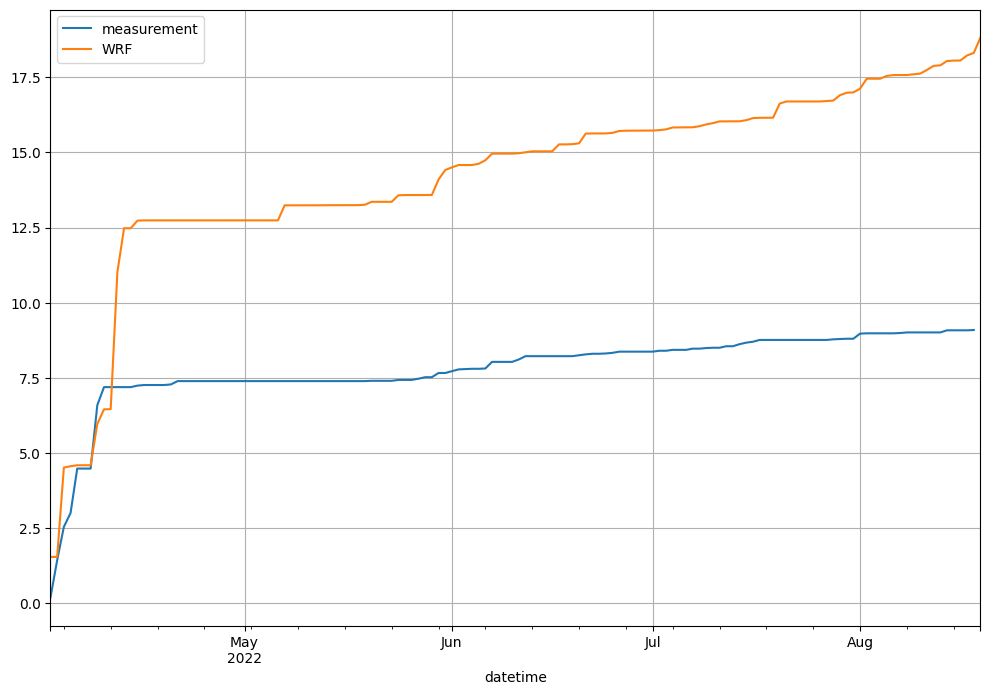

In [12]:
df = open_measurements(folder + "22_AWS-PPuertoBaquerizoMoreno_data.csv")
fig, ax = plt.subplots(figsize=(12,8))
df["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement")
# df["PCP_tot_bucket"].cumsum().plot(ax=ax)
wrf_prcp["puertobaccerizomoreno"].loc[:"2022-08-19"].cumsum().plot(ax=ax, label="WRF")
plt.legend()
plt.grid()
plt.show()

/tmp/ipykernel_2410079/1163385197.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return df.resample("D").sum()


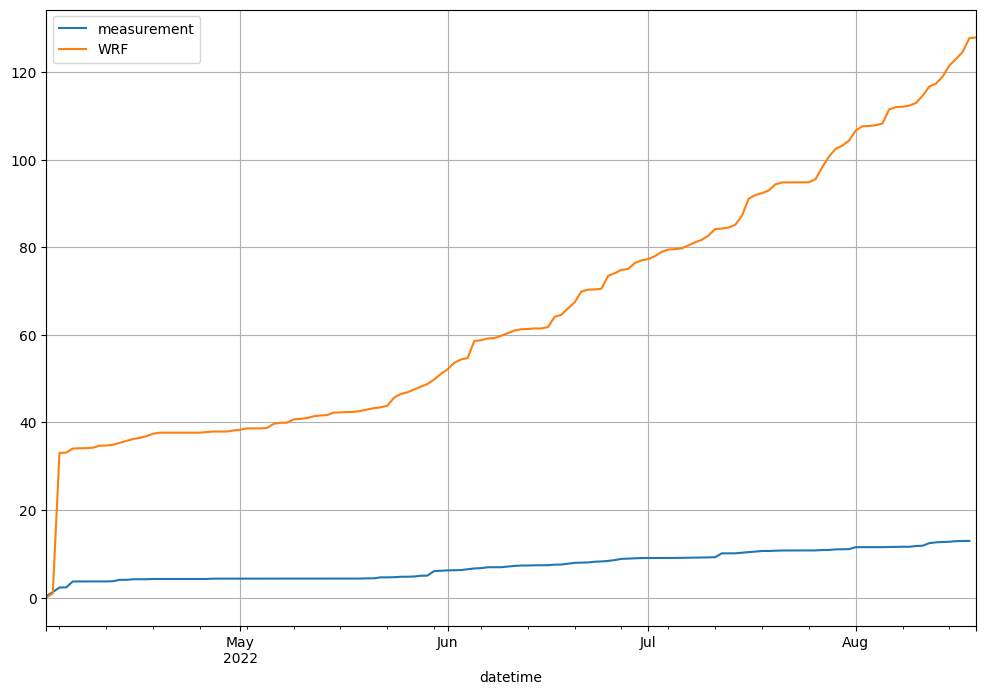

In [13]:
df = open_measurements(folder + "18_AWS-PLaGalapaguera_data.csv")
fig, ax = plt.subplots(figsize=(12,8))
df["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement")
# df["PCP_tot_bucket"].cumsum().plot(ax=ax)
wrf_prcp["lagalapaguera"].loc[:"2022-08-19"].cumsum().plot(ax=ax, label="WRF")
plt.legend()
plt.grid()
plt.show()

/tmp/ipykernel_2410079/1163385197.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return df.resample("D").sum()


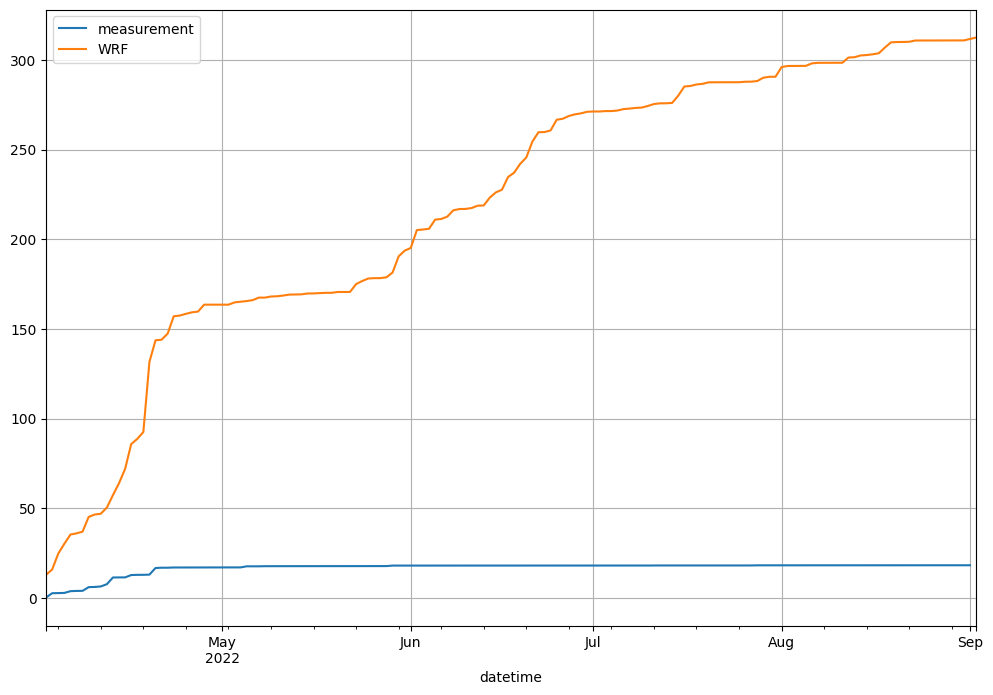

In [14]:
df = open_measurements(folder + "14_AWS-PSierraNegra_data.csv")
fig, ax = plt.subplots(figsize=(12,8))
df["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement")
# df["PCP_tot_bucket"].cumsum().plot(ax=ax)
wrf_prcp["negra"].loc[:"2022-09-02"].cumsum().plot(ax=ax, label="WRF")
plt.legend()
plt.grid()
plt.show()

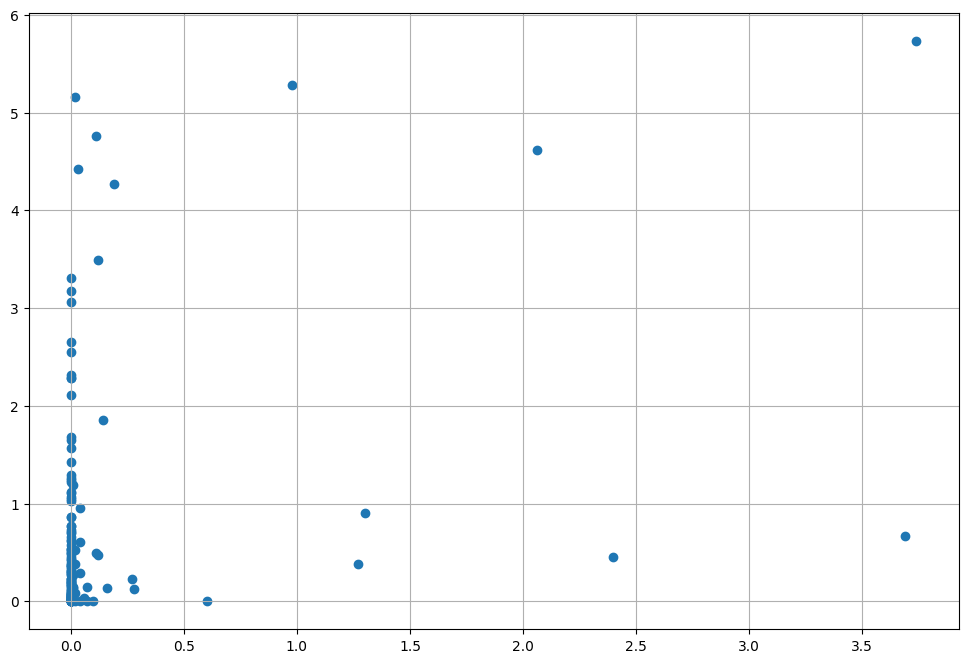

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(df["PCP_diff_radar"],wrf_prcp["cuevadesucre"].loc[:"2022-09-01"])
plt.grid()

/tmp/ipykernel_2410079/1163385197.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return df.resample("D").sum()


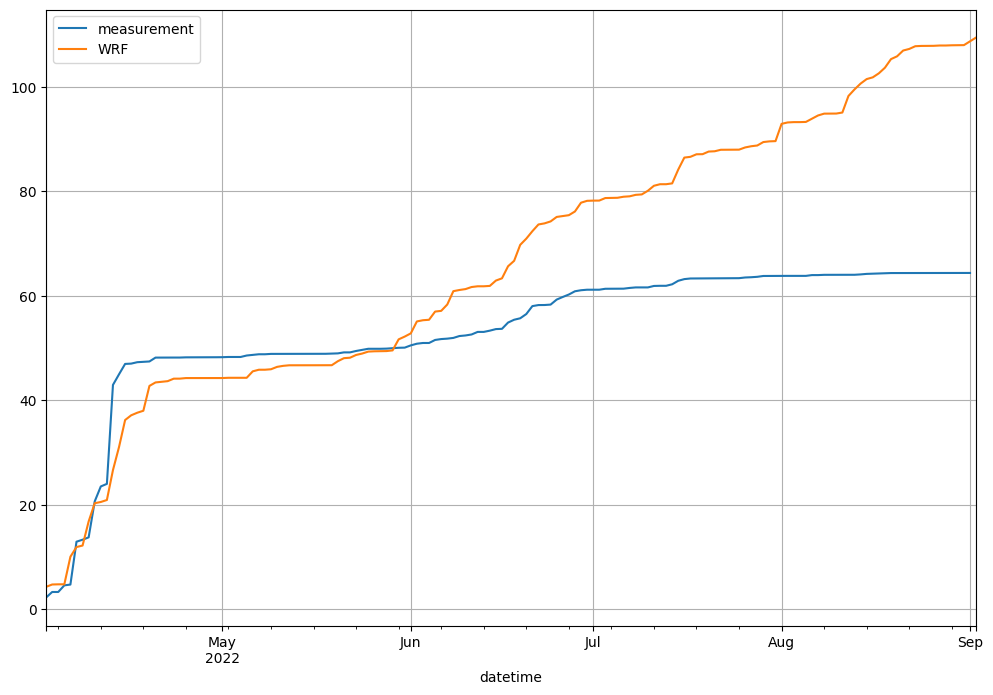

In [35]:
df = open_measurements(folder + "16_AWS-PCuevadeSucre_data.csv")
fig, ax = plt.subplots(figsize=(12,8))
df["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement")
# df["PCP_tot_bucket"].cumsum().plot(ax=ax)
wrf_prcp["cuevadesucre"].loc[:"2022-09-02"].cumsum().plot(ax=ax, label="WRF")
plt.legend()
plt.grid()
plt.show()

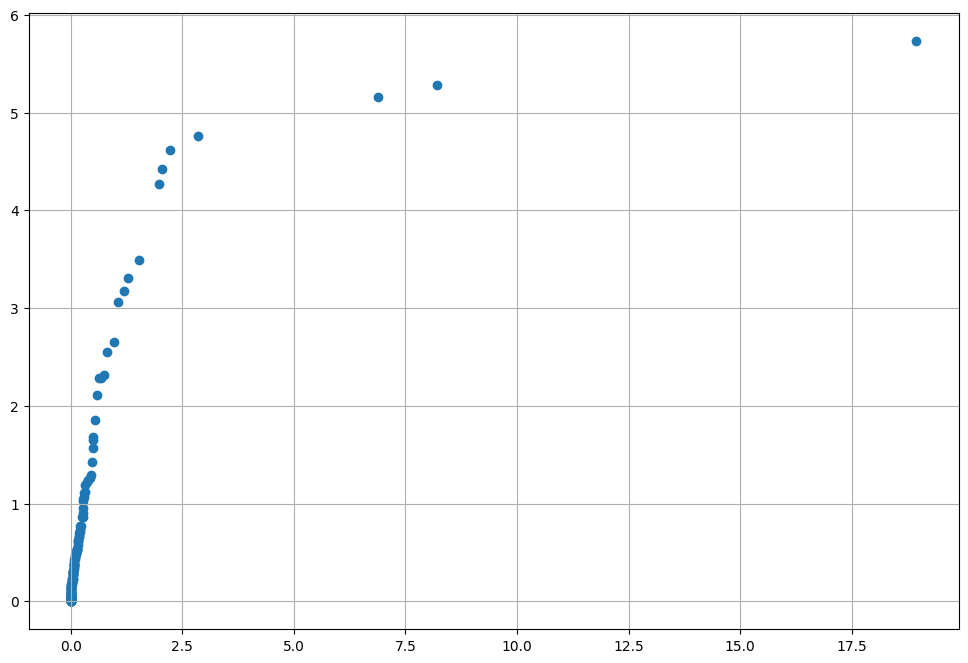

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(df["PCP_diff_radar"].sort_values(),wrf_prcp["cuevadesucre"].loc[:"2022-09-01"].sort_values())
plt.grid()